In [1]:
# ERROR:


import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from ast import literal_eval
from collections import OrderedDict

%matplotlib inline

In [2]:
prep_labels = [
    'Shape', 
    'First Order', 
    'GLCM', 
    'GLRLM', 
    'GLSZM', 
    'GLDM', 
    'NGTDM', 
    'PET parameter',
    'Clinical'
]
colours = OrderedDict(
    [
        ('Shape', sns.color_palette()[0]),
        ('Clinical', sns.color_palette()[1]),
        ('First Order', sns.color_palette()[2]),
        ('GLCM', sns.color_palette()[3]),
        ('GLRLM', sns.color_palette()[8]),
        ('GLSZM', sns.color_palette()[5]),
        ('GLDM', sns.color_palette()[6]),
        ('NGTDM', sns.color_palette()[7]),
        ('PET parameter', sns.color_palette()[4])
    ]
)

In [3]:
X = pd.read_csv('./../../../data_source/to_analysis/anomaly_filtered_concat.csv', index_col=0)
features = list(X.columns)
features[:6], len(features)

(['original_shape_Elongation',
  'original_shape_Flatness',
  'original_shape_LeastAxis',
  'original_shape_MajorAxis',
  'original_shape_Maximum2DDiameterColumn',
  'original_shape_Maximum2DDiameterRow'],
 550)

In [4]:
X.filter(regex='shape').shape[1]

13

In [5]:
X.filter(regex='CT_original_firstorder').shape[1] / 3

8.666666666666666

In [6]:
X.filter(regex='CT_original').shape[1] / 3

82.66666666666667

In [7]:
results = pd.read_csv(
    './../../../data_source/results/dtree_univariate_sfs/50evals_50reps_dtree_univariate_sfs_dfs.csv', 
    index_col=0
)
results.head()

,exp_id,experiment_id,memory,steps,VarianceThreshold,StandardScaler,StudentTTestSelection,DTreeEstimator,VarianceThreshold__threshold,StandardScaler__copy,...,Chi2Selection__error_handling,Chi2Selection__num_features,MRMRSelection,MRMRSelection__error_handling,MRMRSelection__num_features,MRMRSelection__num_neighbors,ReliefFSelection,ReliefFSelection__error_handling,ReliefFSelection__num_features,ReliefFSelection__num_neighbors
0,44,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
results.shape

(400, 59)

In [9]:
votes = results['feature_votes']
votes.head()

0    [7 8 4 7 6 4 3 3 4 2 3 3 1 1 2 1 1 5 0 1 1 1 0...
1    [10 10 10 10 10 10 10 10 10 10 10 10 10 10  9 ...
2    [7 5 7 8 4 5 5 5 2 7 6 5 5 8 7 6 7 7 4 8 7 4 7...
3    [ 2 10 10  8  0  0  0  0  0  0  0  0  0  0  0 ...
4    [ 2 10 10  8  0  0  0  0  0  0  0  0  0  0  0 ...
Name: feature_votes, dtype: object

In [10]:
len(list(votes.values[0].replace('\n', '').replace('[', '').replace(']', '').replace(' ', '')))

550

In [11]:
len(list(votes[0].replace(' ', '').replace('\n', ''))[1:-1])

550

In [15]:
# Goal:
# * Sort votes and collect corresponding labels.

global_votes = np.zeros(X.shape[1], dtype=int)
for str_array in votes:
    _votes = list(votes[0].replace(' ', '').replace('\n', ''))
    votes_arr = np.array(list(map(int, list(_votes[1:-1]))), dtype=int)
    global_votes += votes_arr

idx = np.argsort(global_votes)[::-1]
labels = np.array(features)[idx]
sorted_votes = np.trim_zeros(global_votes[idx], trim='b')
labels = labels[:len(sorted_votes)]


data = pd.DataFrame(
    {
        'votes': sorted_votes,
        'labels': labels,
        
    }
)
data.head()

,votes,labels
0,3200,original_shape_Flatness
1,2800,original_shape_Elongation
2,2800,original_shape_MajorAxis
3,2400,original_shape_Maximum2DDiameterColumn
4,2000,ICD-10_C02


In [16]:
# Sanity check.
max(global_votes), sorted_votes[0]

(3200, 3200)

In [17]:
len(global_votes), len(sorted_votes)

(550, 53)

In [18]:
def prep_feature_labels(labels):
    prep_labels = []
    for label in labels:
        comps = label.split('_')

        if len(comps) == 1:
            prep_labels.append(label.title())
        elif len(comps) == 2:
            new_label = '{}: {}'.format(comps[0], comps[1])
            prep_labels.append(new_label)
        elif len(comps) == 3:
            filter_type, feature_type, name = comps
            if len(name) > 15:
                #name_comps = re.findall('[A-Z][^A-Z]*', name)
                #name = ('-\n').join((('').join(name_comps[:2]), ('').join(name_comps[2:])))
                new_label = '{}'.format(name)
            else:
                new_label = '{}'.format(name)
            prep_labels.append(new_label)
        elif len(comps) == 4:
            image_type, filter_type, feature_type, name = comps
            if len(name) > 15:
                #name_comps = re.findall('[A-Z][^A-Z]*', name)
                #name = ('-\n').join((('').join(name_comps[:2]), ('').join(name_comps[2:])))
                new_label = '\n{}'.format(name)
            else:
                new_label = '{}'.format(name)
            prep_labels.append(new_label)
            
    return prep_labels

In [19]:
def feature_labels(labels):    
    
    keys = []
    for label in labels:
        if 'shape' in label:
            keys.append('Shape')
        elif 'firstorder' in label:
            keys.append('First Order')
        elif 'glcm' in label:
            keys.append('GLCM')
        elif 'glrlm' in label:
            keys.append('GLRLM')
        elif 'glszm' in label:
            keys.append('GLSZM')
        elif 'gldm' in label:
            keys.append('GLDM')
        elif 'ngtdm' in label:
            keys.append('NGTDM')
        elif 'PETparam' in label:
            keys.append('PET parameter')
        else:
            keys.append('Clinical')

    return keys

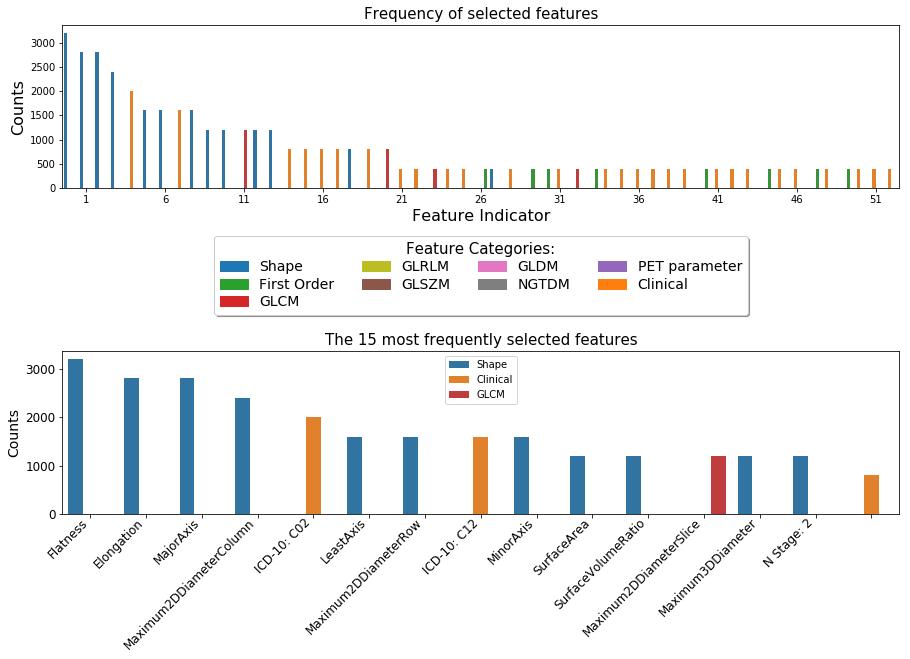

In [20]:
keys = feature_labels(labels)
handles = [
    mpatches.Patch(color=colours[key], label=key) for key in prep_labels
]

fig, axes = plt.subplots(nrows=2, figsize=(15, 9))
plt.tick_params(axis='both', labelsize=12)

sns.barplot(
    x=np.arange(np.size(sorted_votes)), 
    y=sorted_votes, 
    ax=axes[0], 
    hue=keys,
    palette=colours,
)
feature_id = np.arange(1, sorted_votes.size, 5)
axes[0].set_title('Frequency of selected features', fontsize=15)
axes[0].set_xticks(feature_id)
axes[0].set_xticklabels(feature_id)
axes[0].set_ylabel('Counts', fontsize=16)
axes[0].set_xlabel('Feature Indicator', fontsize=16)
axes[0].legend(
    handles=handles,
    title='Feature Categories:', 
    title_fontsize=15,
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.25), 
    fancybox=True, 
    shadow=True, 
    fontsize=14,
    ncol=4,
    labelspacing=0.25
)

n = 15
keys = feature_labels(labels[:n])
sns.barplot(
    x=np.arange(np.size(sorted_votes[:n])), 
    y=sorted_votes[:n], 
    ax=axes[1], 
    hue=keys,
    palette=colours,
)
fnames = prep_feature_labels(labels[:n])
#axes[1].legend().set_visible(False)
axes[1].set_title('The {} most frequently selected features'.format(n), fontsize=15)
axes[1].set_xticklabels(fnames, rotation=45, ha='right', va='center_baseline')
axes[1].set_ylabel('Counts', fontsize=14)

plt.subplots_adjust(hspace=1)

plt.savefig(
    './../../../figures/feature_votes_50evals_50_dtree_univariate_sfs.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [21]:
cats = ['shape',
        'firstorder',
        'glcm',
        'glrlm',
        'glszm',
        'gldm',
        'ngtdm']
res = {}
for cat in cats:
    p = 0
    c = 0
    for label in labels:
        if cat in label:
            c = c + 1
    res[cat] = c
            
res

{'shape': 13,
 'firstorder': 8,
 'glcm': 4,
 'glrlm': 0,
 'glszm': 0,
 'gldm': 0,
 'ngtdm': 0}

In [22]:
sorted_votes

array([3200, 2800, 2800, 2400, 2000, 1600, 1600, 1600, 1600, 1200, 1200,
       1200, 1200, 1200,  800,  800,  800,  800,  800,  800,  800,  400,
        400,  400,  400,  400,  400,  400,  400,  400,  400,  400,  400,
        400,  400,  400,  400,  400,  400,  400,  400,  400,  400,  400,
        400,  400,  400,  400,  400,  400,  400,  400,  400])

In [23]:
# NOTE: Num clinical features.
len(labels) - sum(res.values())

28

In [24]:
len(list(X.filter(regex='shape').columns))

13

In [25]:
len(list(X.filter(regex='CT').columns))

248

In [26]:
len(list(X.filter(regex='PET').columns))

247

In [27]:
nogos = list(X.filter(regex='shape').columns) 
nogos = nogos + list(X.filter(regex='CT').columns) 
nogos = nogos + list(X.filter(regex='PET').columns)

cols = {}
for num, col in enumerate(X.columns):
    if col not in nogos:
        cols[col] = sorted_votes[num]
        print(col, ':', sorted_votes[num])
        
# Pasienten er mann/kvinne er relativt viktig. Det er flere menn enn kvinner
# i datasettet. Kan være knyttet til HPV variabel fordi ikke utypisk at menn får HPV?.

# 

Age : 1200
Years Smoking : 800
Naxogin Days : 800
Sex_M : 800
ICD-10_C02 : 800
ICD-10_C03 : 800
ICD-10_C04 : 800
ICD-10_C05 : 800
ICD-10_C06 : 400
ICD-10_C09 : 400
ICD-10_C10 : 400
ICD-10_C12 : 400
ICD-10_C13 : 400
ICD-10_C32 : 400
T Stage_2 : 400
T Stage_3 : 400
T Stage_4 : 400
N Stage_1 : 400
N Stage_2 : 400
N Stage_3 : 400
Histology_1.0 : 400
Histology_2.0 : 400
Histology_3.0 : 400
HPV_1 : 400
HPV_2 : 400
ECOG_1 : 400
ECOG_2 : 400
Charlson_1 : 400
Charlson_2 : 400
Charlson_3 : 400
Charlson_4 : 400
Charlson_5 : 400
Cisplatin_1 : 400
Cisplatin_2 : 400
Cisplatin_3 : 400
Cisplatin_4 : 400
Cisplatin_5 : 400
Cisplatin_6 : 400
Stage 1 : 400
Stage 2 : 400


IndexError: index 53 is out of bounds for axis 0 with size 53

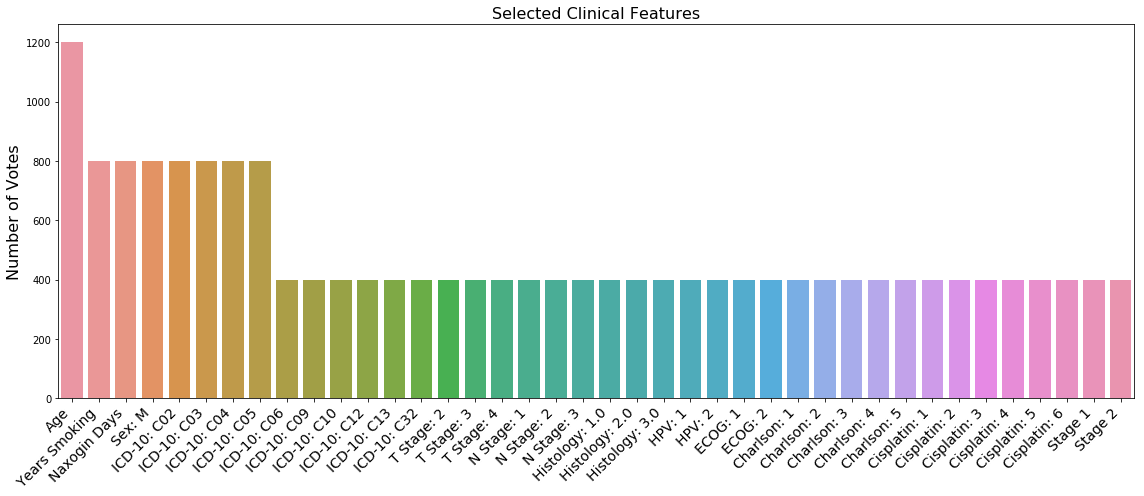

In [31]:
x_coords = np.arange(len(cols.values()))
clinical_labels = prep_feature_labels(cols.keys())

plt.figure(figsize=(16, 7))
plt.title('Selected Clinical Features', fontsize=16)
sns.barplot(x=x_coords, y=list(cols.values()))
plt.xticks(x_coords, clinical_labels, rotation=45, ha='right', fontsize=14)
plt.ylabel('Number of Votes', fontsize=16)
#plt.ylim([0, 250])
plt.tight_layout()
plt.savefig(
    './../../../figures/clinical_feature_votes50evals_50reps_dtree_univariate_sfs.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [29]:
# Group by encoded features.
df_clinical = pd.DataFrame.from_dict(cols, orient='index', columns=['Votes'])
df_clinical.head()

,Votes
Age,1200
Years Smoking,800
Naxogin Days,800
Sex_M,800
ICD-10_C02,800


In [30]:
grouper = []
for num, label in enumerate(df_clinical.index):
    if 'ICD-10' in label:
        grouper.append('IDC-10')
    elif 'Stage' in label:
        grouper.append('Stage')
    elif 'Histology' in label:
        grouper.append('Histology')
    elif 'HPV' in label:
        grouper.append('HPV')
    elif 'ECOG' in label:
        grouper.append('ECOG')
    elif 'Charlson' in label:
        grouper.append('Charlson')
    elif 'Cisplatin' in label:
        grouper.append('Cisplatin')
    else:
        grouper.append(label)

df_clinical['groups'] = grouper

df_clinical.head()

,Votes,groups
Age,1200,Age
Years Smoking,800,Years Smoking
Naxogin Days,800,Naxogin Days
Sex_M,800,Sex_M
ICD-10_C02,800,IDC-10


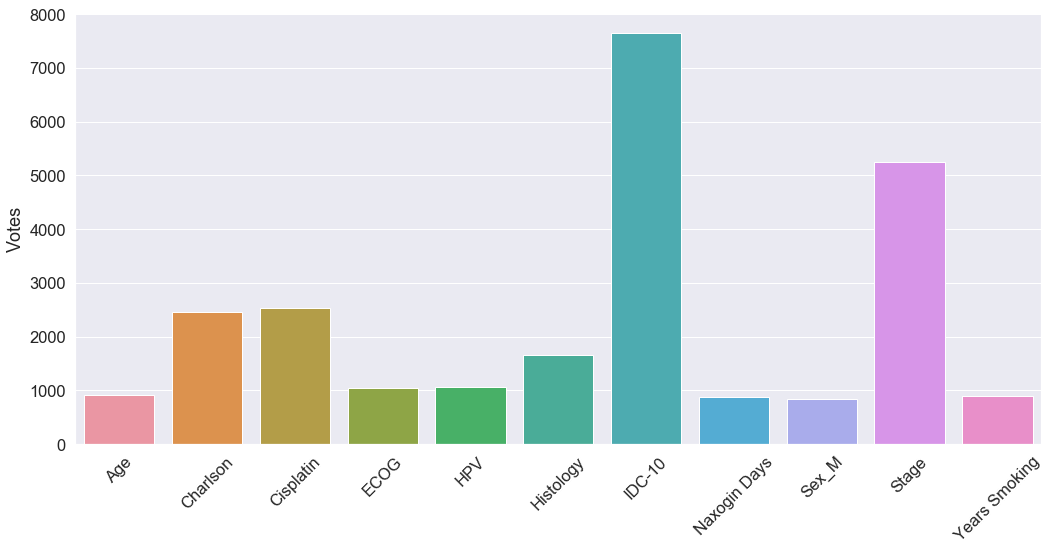

In [107]:
# Missing: 
df_clinical_grps = df_clinical.groupby('groups').sum()

plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.barplot(y='Votes', x=df_clinical_grps.index, data=df_clinical_grps)
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    #'./../../../figures/grouped_clinical_feature_biomarker.png',
    './../../../figures/grouped_100evals_100reps_clinical_feature_biomarker.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [109]:
np.squeeze(np.where(results['test_score'] == results['test_score'].max()))

array([471, 571])

In [108]:
idx = int(np.squeeze(np.where(results['test_score'] == results['test_score'].max())))
best_run = results.iloc[idx, :]
best_run_votes = best_run['feature_votes']
_votes = list(best_run_votes.replace(' ', '').replace('\n', ''))
votes_arr = np.array(list(map(int, list(_votes[1:-1]))), dtype=int)

idx = np.argsort(votes_arr)[::-1]
labels = np.array(features)[idx]
sorted_votes = np.trim_zeros(votes_arr[idx], trim='b')
labels = prep_feature_labels(labels[:len(sorted_votes)])

y_coords = np.arange(np.size(labels))

plt.figure(figsize=(8, 15))
sns.set(font_scale=1.5)
sns.barplot(y=labels, x=sorted_votes, )
plt.xlabel('Votes')
plt.yticks(y_coords, labels, va='bottom', fontsize=14)
plt.tight_layout()

plt.savefig(
    './../../../figures/best_run_features.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
# Group by encoded features.
df_clinical = pd.DataFrame(sorted_votes, columns=['Votes'])
df_clinical.index = labels
df_clinical.head()

In [ ]:
grouper = []
for num, label in enumerate(df_clinical.index):
    if 'ICD-10' in label:
        grouper.append('IDC-10')
    elif 'Stage' in label:
        grouper.append('Stage')
    elif 'Histology' in label:
        grouper.append('Histology')
    elif 'HPV' in label:
        grouper.append('HPV')
    elif 'ECOG' in label:
        grouper.append('ECOG')
    elif 'Charlson' in label:
        grouper.append('Charlson')
    elif 'Cisplatin' in label:
        grouper.append('Cisplatin')
    else:
        grouper.append(label)

df_clinical['groups'] = grouper

df_clinical.head()

In [ ]:
# Missing: 
df_clinical_grps = df_clinical.groupby('groups').sum()

plt.figure(figsize=(10, 15))
sns.set(font_scale=1.5)
sns.barplot(x='Votes', y=df_clinical_grps.index, data=df_clinical_grps)
plt.xlabel('Votes')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    './../../../figures/grouped_best_run_features.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)